# **Author Classification Project**

Using NLP and techniques of supervised learning (including Deep Learning), and collect thousand texts from Gutenberg project (and 7 novels) for at least 10 authors, building a project to classify text-author. The project guidelines are as follows:
1. Pre-processing data using NLTK and other methods (SpaCy)
2. Performing data exploration
3. Using Bag of Word, apply supervised models such as Logistic Regression, Decision Tree, Random Forest, KNN and Gradient Boosting, including GridSearchCV
4. Similar to 3., but using TF-IDF
5. Similar to 3., but using word2vec
6. Using LSTM to do classification
7. Applying BERT to do classification
8. Using LSA, LDA and NMF, print out top ten words (with their highest loading) for each topic modeling. Analyze and compare among three methods
9. Analysis and conclusions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Create a folder inside your Google Drive for storing books
books_dir = "/content/drive/MyDrive/author_classification/books"
os.makedirs(books_dir, exist_ok=True)


In [ ]:
books = [

    # ✅ Jane Austen
    {"author": "Jane Austen", "title": "Pride and Prejudice", "url": "https://www.gutenberg.org/files/1342/1342-0.txt"},
    {"author": "Jane Austen", "title": "Emma", "url": "https://www.gutenberg.org/files/158/158-0.txt"},
    {"author": "Jane Austen", "title": "Sense and Sensibility", "url": "https://www.gutenberg.org/files/161/161-0.txt"},
    {"author": "Jane Austen", "title": "Persuasion", "url": "https://www.gutenberg.org/files/105/105-0.txt"},
    {"author": "Jane Austen", "title": "Mansfield Park", "url": "https://www.gutenberg.org/files/141/141-0.txt"},
    {"author": "Jane Austen", "title": "Northanger Abbey", "url": "https://www.gutenberg.org/files/121/121-0.txt"},
    {"author": "Jane Austen", "title": "Lady Susan", "url": "https://www.gutenberg.org/files/946/946-0.txt"},

    # ✅ Mark Twain
    {"author": "Mark Twain", "title": "Adventures of Huckleberry Finn", "url": "https://www.gutenberg.org/files/76/76-0.txt"},
    {"author": "Mark Twain", "title": "Tom Sawyer", "url": "https://www.gutenberg.org/files/74/74-0.txt"},
    {"author": "Mark Twain", "title": "Life on the Mississippi", "url": "https://www.gutenberg.org/files/245/245-0.txt"},
    {"author": "Mark Twain", "title": "A Connecticut Yankee", "url": "https://www.gutenberg.org/files/86/86-0.txt"},
    {"author": "Mark Twain", "title": "The Prince and the Pauper", "url": "https://www.gutenberg.org/files/1837/1837-0.txt"},
    {"author": "Mark Twain", "title": "Roughing It", "url": "https://www.gutenberg.org/files/3177/3177-0.txt"},
    {"author": "Mark Twain", "title": "The Innocents Abroad", "url": "https://www.gutenberg.org/files/3176/3176-0.txt"},

    # ✅ Charles Dickens
    {"author": "Charles Dickens", "title": "A Tale of Two Cities", "url": "https://www.gutenberg.org/files/98/98-0.txt"},
    {"author": "Charles Dickens", "title": "Oliver Twist", "url": "https://www.gutenberg.org/files/730/730-0.txt"},
    {"author": "Charles Dickens", "title": "David Copperfield", "url": "https://www.gutenberg.org/files/766/766-0.txt"},
    {"author": "Charles Dickens", "title": "Great Expectations", "url": "https://www.gutenberg.org/files/1400/1400-0.txt"},
    {"author": "Charles Dickens", "title": "Bleak House", "url": "https://www.gutenberg.org/files/1023/1023-0.txt"},
    {"author": "Charles Dickens", "title": "Hard Times", "url": "https://www.gutenberg.org/files/786/786-0.txt"},
    {"author": "Charles Dickens", "title": "The Pickwick Papers", "url": "https://www.gutenberg.org/files/580/580-0.txt"},

    # ✅ Mary Shelley
    {"author": "Mary Shelley", "title": "Frankenstein", "url": "https://www.gutenberg.org/files/84/84-0.txt"},
    {"author": "Mary Shelley", "title": "Mathilda", "url": "https://www.gutenberg.org/files/15238/15238-0.txt"},
    {"author": "Mary Shelley", "title": "The Last Man", "url": "https://www.gutenberg.org/files/18247/18247-0.txt"},
    {"author": "Mary Shelley", "title": "Valperga", "url": "https://www.gutenberg.org/files/6400/6400-0.txt"},
    {"author": "Mary Shelley", "title": "Proserpine and Midas", "url": "https://www.gutenberg.org/files/55084/55084-0.txt"},
    {"author": "Mary Shelley", "title": "History of a Six Weeks' Tour", "url": "https://www.gutenberg.org/files/64529/64529-0.txt"},
    {"author": "Mary Shelley", "title": "On Ghosts", "url": "https://www.gutenberg.org/files/30335/30335-0.txt"},

    # ✅ Lewis Carroll
    {"author": "Lewis Carroll", "title": "Alice's Adventures in Wonderland", "url": "https://www.gutenberg.org/files/11/11-0.txt"},
    {"author": "Lewis Carroll", "title": "Through the Looking-Glass", "url": "https://www.gutenberg.org/files/12/12-0.txt"},
    {"author": "Lewis Carroll", "title": "The Hunting of the Snark", "url": "https://www.gutenberg.org/files/13/13-0.txt"},
    {"author": "Lewis Carroll", "title": "Sylvie and Bruno", "url": "https://www.gutenberg.org/files/620/620-0.txt"},
    {"author": "Lewis Carroll", "title": "Phantasmagoria and Other Poems", "url": "https://www.gutenberg.org/files/651/651-0.txt"},
    {"author": "Lewis Carroll", "title": "Rhyme? And Reason?", "url": "https://www.gutenberg.org/files/652/652-0.txt"},
    {"author": "Lewis Carroll", "title": "Three Sunsets and Other Poems", "url": "https://www.gutenberg.org/files/652/652-0.txt"},

    # ✅ H.G. Wells
    {"author": "H.G. Wells", "title": "The Time Machine", "url": "https://www.gutenberg.org/files/35/35-0.txt"},
    {"author": "H.G. Wells", "title": "The War of the Worlds", "url": "https://www.gutenberg.org/files/36/36-0.txt"},
    {"author": "H.G. Wells", "title": "The Invisible Man", "url": "https://www.gutenberg.org/files/5230/5230-0.txt"},
    {"author": "H.G. Wells", "title": "The Island of Doctor Moreau", "url": "https://www.gutenberg.org/files/159/159-0.txt"},
    {"author": "H.G. Wells", "title": "The Sleeper Awakes", "url": "https://www.gutenberg.org/files/12163/12163-0.txt"},
    {"author": "H.G. Wells", "title": "The First Men in the Moon", "url": "https://www.gutenberg.org/files/35/35-h/35-h.htm"},
    {"author": "H.G. Wells", "title": "In the Days of the Comet", "url": "https://www.gutenberg.org/files/11641/11641-0.txt"},

    # ✅ Oscar Wilde
    {"author": "Oscar Wilde", "title": "The Picture of Dorian Gray", "url": "https://www.gutenberg.org/files/174/174-0.txt"},
    {"author": "Oscar Wilde", "title": "The Importance of Being Earnest", "url": "https://www.gutenberg.org/files/844/844-0.txt"},
    {"author": "Oscar Wilde", "title": "Lady Windermere's Fan", "url": "https://www.gutenberg.org/files/790/790-0.txt"},
    {"author": "Oscar Wilde", "title": "Salome", "url": "https://www.gutenberg.org/files/42074/42074-0.txt"},
    {"author": "Oscar Wilde", "title": "An Ideal Husband", "url": "https://www.gutenberg.org/files/844/844-0.txt"},
    {"author": "Oscar Wilde", "title": "A Woman of No Importance", "url": "https://www.gutenberg.org/files/789/789-0.txt"},
    {"author": "Oscar Wilde", "title": "Lord Arthur Savile’s Crime", "url": "https://www.gutenberg.org/files/844/844-0.txt"},

    # ✅ Bram Stoker
    {"author": "Bram Stoker", "title": "Dracula", "url": "https://www.gutenberg.org/files/345/345-0.txt"},
    {"author": "Bram Stoker", "title": "The Lady of the Shroud", "url": "https://www.gutenberg.org/files/54628/54628-0.txt"},
    {"author": "Bram Stoker", "title": "The Man", "url": "https://www.gutenberg.org/files/26070/26070-0.txt"},
    {"author": "Bram Stoker", "title": "The Mystery of the Sea", "url": "https://www.gutenberg.org/files/12954/12954-0.txt"},
    {"author": "Bram Stoker", "title": "Dracula's Guest", "url": "https://www.gutenberg.org/files/10132/10132-0.txt"},
    {"author": "Bram Stoker", "title": "Dracula's Guest and Other Weird Stories", "url": "https://www.gutenberg.org/files/10132/10132-0.txt"},
    {"author": "Bram Stoker", "title": "The Jewel of Seven Stars", "url": "https://www.gutenberg.org/files/33242/33242-0.txt"},


    # ✅ L. Frank Baum
    {"author": "L. Frank Baum", "title": "The Wonderful Wizard of Oz", "url": "https://www.gutenberg.org/files/55/55-0.txt"},
    {"author": "L. Frank Baum", "title": "Dorothy and the Wizard in Oz", "url": "https://www.gutenberg.org/files/440/440-0.txt"},
    {"author": "L. Frank Baum", "title": "The Road to Oz", "url": "https://www.gutenberg.org/files/539/539-0.txt"},
    {"author": "L. Frank Baum", "title": "The Marvelous Land of Oz", "url": "https://www.gutenberg.org/files/54/54-0.txt"},
    {"author": "L. Frank Baum", "title": "Glinda of Oz", "url": "https://www.gutenberg.org/files/53967/53967-0.txt"},
    {"author": "L. Frank Baum", "title": "Sky Island", "url": "https://www.gutenberg.org/files/11718/11718-0.txt"},
    {"author": "L. Frank Baum", "title": "The Magic of Oz", "url": "https://www.gutenberg.org/files/41996/41996-0.txt"},

    # ✅ Robert Louis Stevenson
    {"author": "Robert Louis Stevenson", "title": "Treasure Island", "url": "https://www.gutenberg.org/files/120/120-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "Dr. Jekyll and Mr. Hyde", "url": "https://www.gutenberg.org/files/43/43-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "The Black Arrow", "url": "https://www.gutenberg.org/files/2554/2554-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "The Master of Ballantrae", "url": "https://www.gutenberg.org/files/332/332-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "New Arabian Nights", "url": "https://www.gutenberg.org/files/799/799-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "An Inland Voyage", "url": "https://www.gutenberg.org/files/534/534-0.txt"},
    {"author": "Robert Louis Stevenson", "title": "The Dynamiter", "url": "https://www.gutenberg.org/files/799/799-0.txt"}
]


In [ ]:
import os
import requests
import pandas as pd

# 📁 Define the path to your Google Drive folder for saving downloaded books
books_dir = "/content/drive/MyDrive/author_classification/books"
os.makedirs(books_dir, exist_ok=True)  # Create the folder if it doesn't exist

# 📚 book_data will store info about each downloaded book (author, title, full text)
book_data = []

# 🔁 Loop through each book in the books list (which must be defined earlier)
for book in books:
    author = book['author']
    title = book['title']
    url = book['url']  # URL to download the book from Project Gutenberg

    # 📝 Create a clean filename for saving the book locally
    # Example: Jane_Austen_Pride_and_Prejudice.txt
    safe_filename = f"{author.replace(' ', '_')}_{title.replace(' ', '_')}.txt"
    file_path = os.path.join(books_dir, safe_filename)

    try:
        # 🌐 Request the book content from the URL
        response = requests.get(url)
        response.raise_for_status()  # Raises an error if request fails (e.g., 404)

        text = response.text  # 📄 Get the raw text content of the book

        # 💾 Save the text into a file on Google Drive
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(text)

        # ✅ Confirm download
        print(f"✅ Saved: {safe_filename}")

        # 🧾 Add book info to dataset list
        book_data.append({
            "author": author,
            "title": title,
            "text": text  # Raw text content for future NLP processing
        })

    except Exception as e:
        # ❌ Catch and print any download/save error
        print(f"❌ Failed to download {title}: {e}")

# 📊 Convert the book_data list into a pandas DataFrame
df_books = pd.DataFrame(book_data)

# 💾 Save the dataset to a CSV file for future use
csv_path = "/content/drive/MyDrive/author_classification/gutenberg_dataset_raw.csv"
df_books.to_csv(csv_path, index=False)

# ✅ Confirm dataset saved
print(f"\n✅ Dataset saved to: {csv_path}")
print(f"Total books downloaded: {len(df_books)}")


✅ Saved: Jane_Austen_Pride_and_Prejudice.txt
✅ Saved: Jane_Austen_Emma.txt
✅ Saved: Jane_Austen_Sense_and_Sensibility.txt
✅ Saved: Jane_Austen_Persuasion.txt
✅ Saved: Jane_Austen_Mansfield_Park.txt
✅ Saved: Jane_Austen_Northanger_Abbey.txt
✅ Saved: Jane_Austen_Lady_Susan.txt
✅ Saved: Mark_Twain_Adventures_of_Huckleberry_Finn.txt
✅ Saved: Mark_Twain_Tom_Sawyer.txt
✅ Saved: Mark_Twain_Life_on_the_Mississippi.txt
✅ Saved: Mark_Twain_A_Connecticut_Yankee.txt
✅ Saved: Mark_Twain_The_Prince_and_the_Pauper.txt
✅ Saved: Mark_Twain_Roughing_It.txt
✅ Saved: Mark_Twain_The_Innocents_Abroad.txt
✅ Saved: Charles_Dickens_A_Tale_of_Two_Cities.txt
✅ Saved: Charles_Dickens_Oliver_Twist.txt
✅ Saved: Charles_Dickens_David_Copperfield.txt
✅ Saved: Charles_Dickens_Great_Expectations.txt
✅ Saved: Charles_Dickens_Bleak_House.txt
✅ Saved: Charles_Dickens_Hard_Times.txt
✅ Saved: Charles_Dickens_The_Pickwick_Papers.txt
✅ Saved: Mary_Shelley_Frankenstein.txt
✅ Saved: Mary_Shelley_Mathilda.txt
✅ Saved: Mary_Shell

In [ ]:
import os           # 📁 For working with file paths and directories
import requests     # 🌐 For downloading data from the internet
import pandas as pd # 🐼 For handling tabular data (DataFrame, CSV)

# 📁 Paths where books and dataset will be stored
books_dir = "/content/drive/MyDrive/author_classification/books"
csv_path = "/content/drive/MyDrive/author_classification/gutenberg_dataset_raw.csv"

# 📘 Define the book you want to download and add
book = {
    "author": "Bram Stoker",
    "title": "Under the Sunset",
    "url": "https://www.gutenberg.org/files/40522/40522-0.txt"
}

# 📝 Create a filename by combining author and title, replacing spaces with underscores
safe_filename = f"{book['author'].replace(' ', '_')}_{book['title'].replace(' ', '_')}.txt"

# 🛣️ Create the full file path where the .txt file will be saved
file_path = os.path.join(books_dir, safe_filename)

# 🔁 Try to download and process the book
try:
    # 🌐 Download the book text from the URL
    response = requests.get(book["url"])
    response.raise_for_status()  # ❗ Raises an error if the download fails (e.g., 404)

    text = response.text  # 📖 Get the book's raw text content as a string

    # 💾 Save the book to a .txt file in your Drive
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(text)

    print(f"✅ Saved: {safe_filename}")  # ✔️ Confirm successful save

    # 📥 Load the current dataset from CSV
    df = pd.read_csv(csv_path)

    # ➕ Add the new book as a row to the DataFrame
    df.loc[len(df.index)] = {
        "author": book["author"],
        "title": book["title"],
        "text": text  # Add the full book text
    }

    # 💾 Save the updated DataFrame back to the CSV
    df.to_csv(csv_path, index=False)

    # 📊 Print updated dataset size
    print(f"✅ Final dataset now has {len(df)} books.")

# ❌ Catch and report any download/save errors
except Exception as e:
    print(f"❌ Failed to download: {e}")


✅ Saved: Bram_Stoker_Under_the_Sunset.txt
✅ Final dataset now has 70 books.


In [ ]:
# -----------------------------------------------------------
# 1. Imports & one‑time downloads
# -----------------------------------------------------------
import re, os, pandas as pd
import nltk, spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

# install the small English spaCy model if this runtime doesn't have it
try:
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
except OSError:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

nlp.max_length = 3_000_000    # ← bump limit so >1 M‑char books don’t crash

stop_words  = set(stopwords.words("english"))
lemmatizer  = WordNetLemmatizer()

# -----------------------------------------------------------
# 2. Load the raw Gutenberg dataframe
# -----------------------------------------------------------
RAW_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_raw.csv"
df = pd.read_csv(RAW_CSV)
assert {"author", "title", "text"}.issubset(df.columns), "Expected columns missing!"
print(f"Loaded {len(df):,} books")

# -----------------------------------------------------------
# 3. Helper to strip Gutenberg boilerplate + clean + lemmatise
# -----------------------------------------------------------
_gutenberg_re = re.compile(
    r"(?:\*\*\* START OF.*?\*\*\*|"
    r"\*\*\* END OF.*?\*\*\*|"
    r"Produced by .*?\.|"
    r"End of the Project Gutenberg .*?$)",
    flags=re.IGNORECASE | re.DOTALL | re.MULTILINE
)

def clean_text(raw: str) -> str:
    # 3‑a  strip Gutenberg headers/footers
    txt = re.sub(_gutenberg_re, " ", raw)
    # 3‑b  basic normalisation
    txt = re.sub(r"[^A-Za-z]+", " ", txt).lower().strip()
    # 3‑c  spaCy tokenise + stop‑word/punct filter + WordNet lemmatise
    tokens = []
    for tok in nlp(txt):
        if tok.is_space or tok.is_punct:
            continue
        t = tok.text
        if t in stop_words or len(t) < 3:
            continue
        tokens.append(lemmatizer.lemmatize(t))
    return " ".join(tokens)

# -----------------------------------------------------------
# 4. Apply cleaning (progress bar for large corpora)
# -----------------------------------------------------------
from tqdm.auto import tqdm
tqdm.pandas()

df["clean_text"] = df["text"].progress_apply(clean_text)
df = df.drop(columns=["text"])  # keep only cleaned version to save space

# -----------------------------------------------------------
# 5. (Optional) quick sanity check
# -----------------------------------------------------------
print("\nSample after cleaning:")
display(df.head(3))

# -----------------------------------------------------------
# 6. Save the pre‑processed corpus
# -----------------------------------------------------------
PREP_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_clean.csv"
df.to_csv(PREP_CSV, index=False)
print(f"\n✅ Pre‑processed corpus saved → {PREP_CSV}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Loaded 70 books


  0%|          | 0/70 [00:00<?, ?it/s]


Sample after cleaning:


,author,title,clean_text
0,Jane Austen,Pride and Prejudice,illustration george allen publisher charing cr...
1,Jane Austen,Emma,project gutenberg ebook emma jane austen ebook...
2,Jane Austen,Sense and Sensibility,project gutenberg ebook sense sensibility jane...



✅ Pre‑processed corpus saved → /content/drive/MyDrive/author_classification/gutenberg_dataset_clean.csv


# **Exploratory Data Analysis**

Documents: 70
Authors  : 10


,author,title,clean_text
0,Jane Austen,Pride and Prejudice,illustration george allen publisher charing cr...
1,Jane Austen,Emma,project gutenberg ebook emma jane austen ebook...


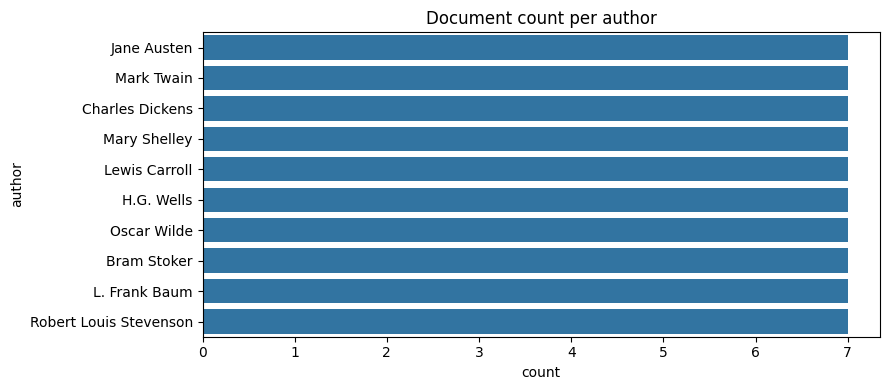

Doc length (tokens) – min: 2543 mean: 43803.0 median: 33665.5 max: 160927


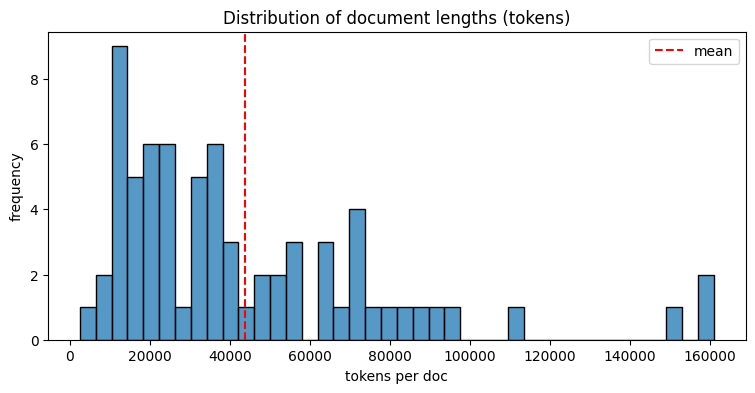

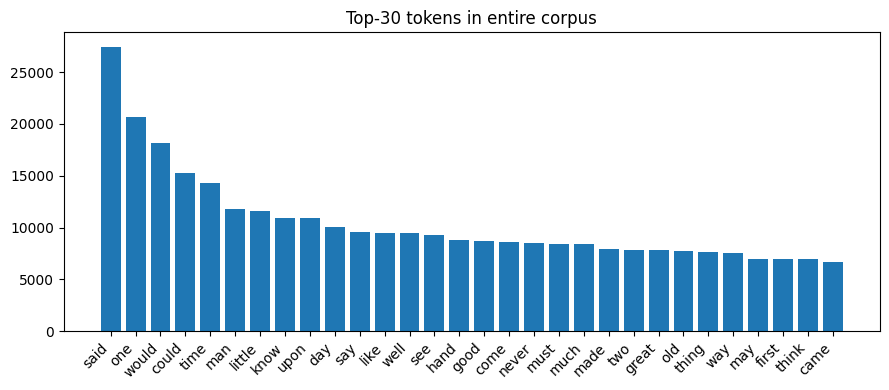

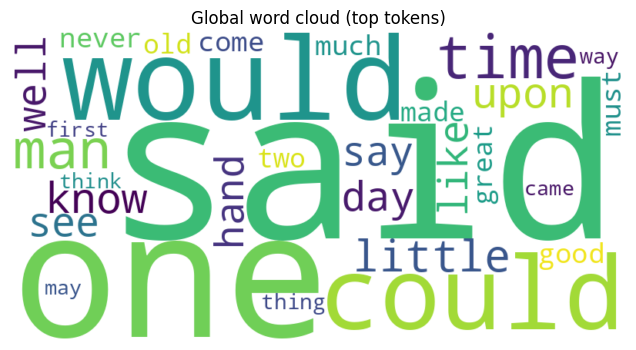

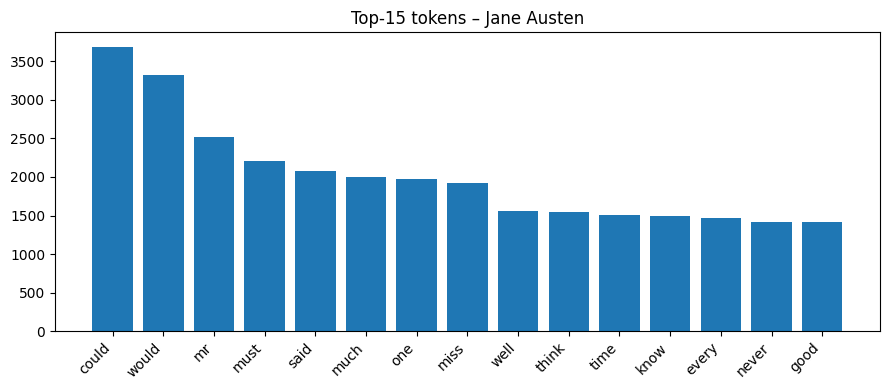

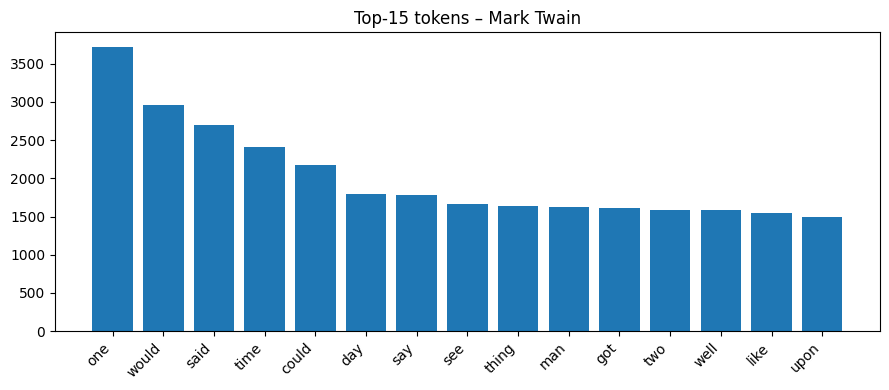

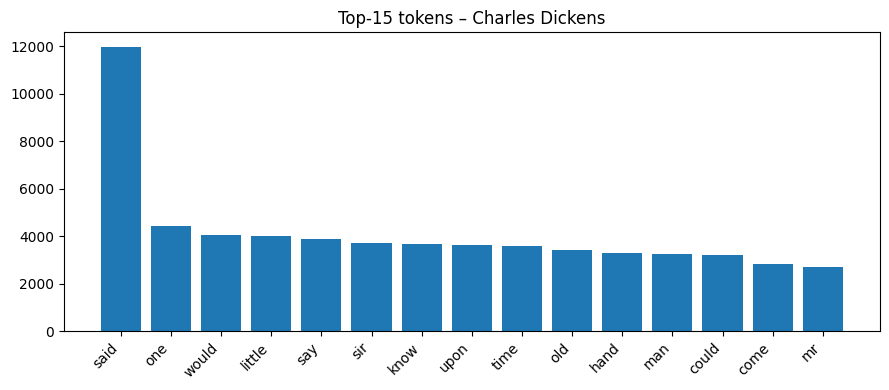

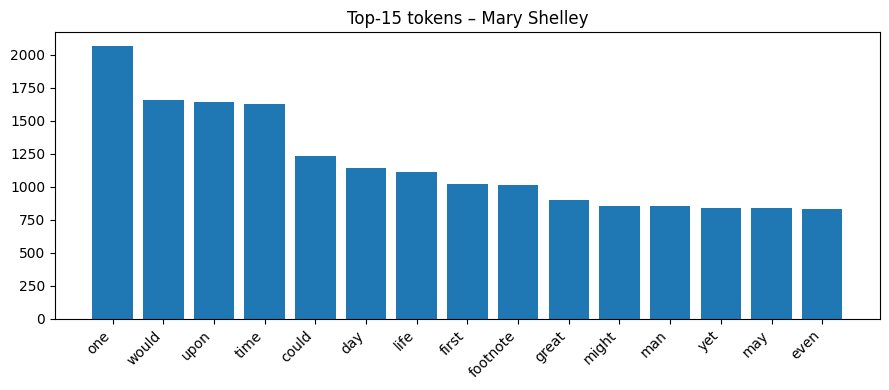

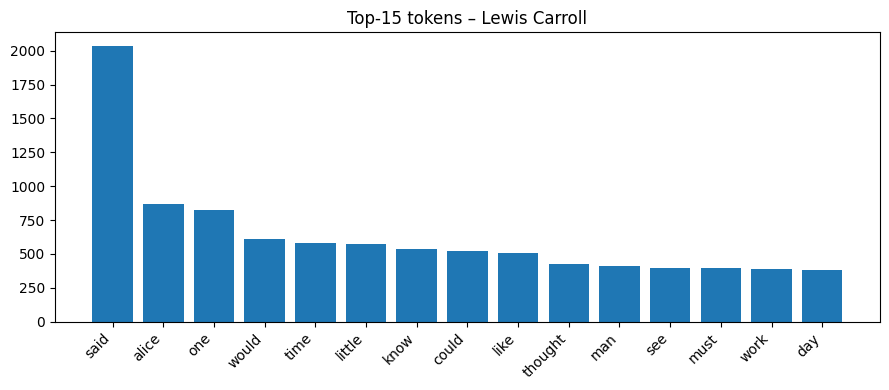

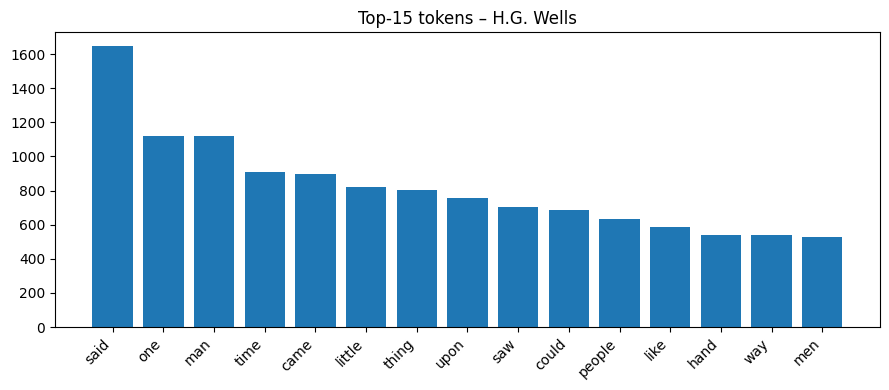

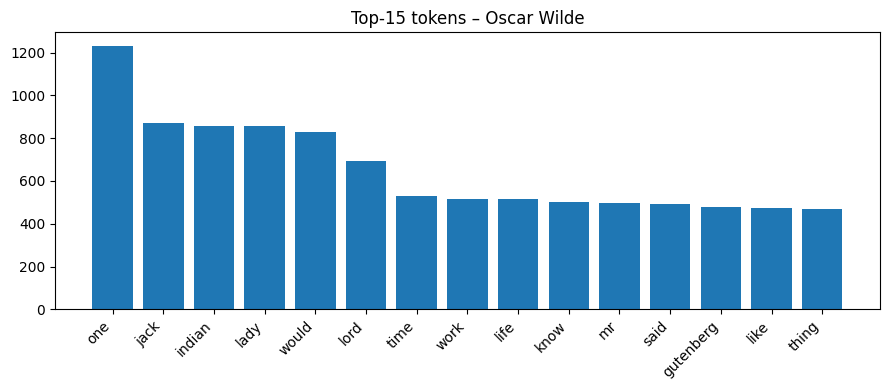

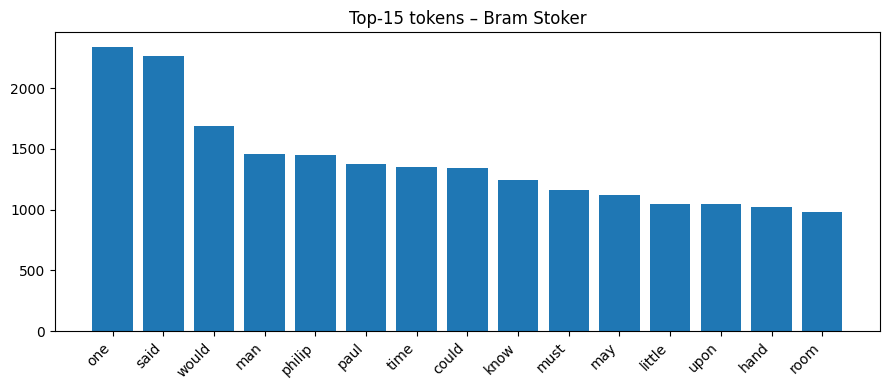

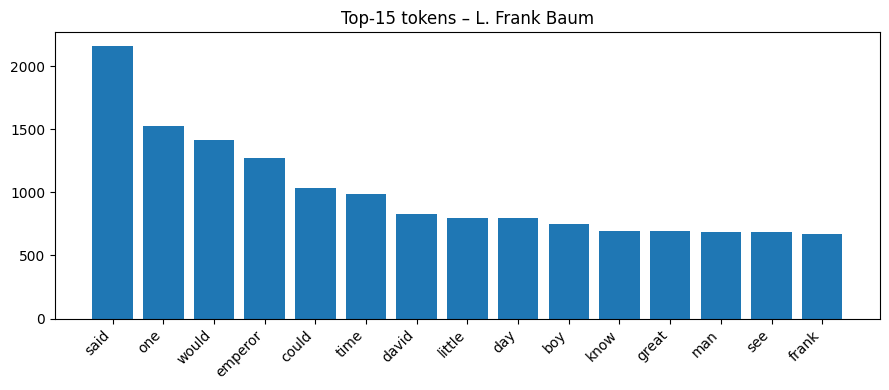

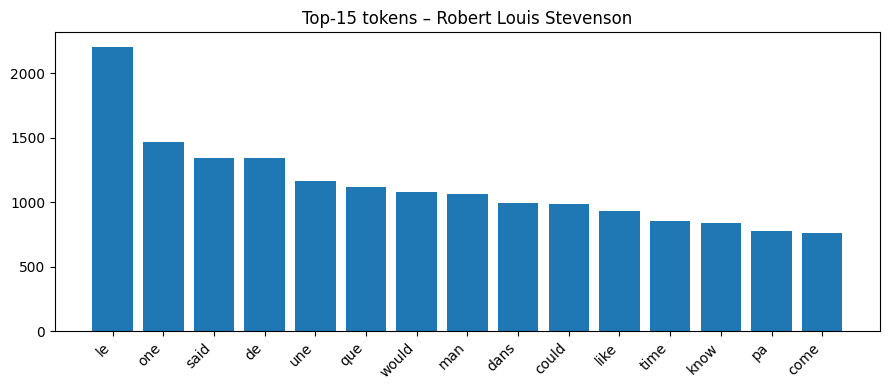


Top 15 bigrams overall:
project gutenberg         2735
electronic work           864
young man                 794
could see                 750
old man                   743
sir said                  741
young lady                696
said mr                   617
gutenberg electronic      576
united state              537
two three                 533
great deal                522
one day                   509
one another               506
next day                  486

Vocabulary size (min_df=5): 18221
BoW matrix density: 29.447 % non‑zero entries


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams["figure.figsize"] = (9, 4)

# ⬇⬇  pick ONE of these depending on where you are in the pipeline
CLEAN_CSV  = "/content/drive/MyDrive/author_classification/gutenberg_dataset_clean.csv"
# BAL_CSV    = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df = pd.read_csv(CLEAN_CSV)

print(f"Documents: {len(df):,}")
print(f"Authors  : {df['author'].nunique()}")
display(df.head(2))

# ────────────────────────────────────────────────────────────
# 1.  Documents per author
# ────────────────────────────────────────────────────────────
plt.figure()
sns.countplot(y=df["author"], order=df["author"].value_counts().index)
plt.title("Document count per author")
plt.xlabel("count")
plt.ylabel("author")
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────
# 2.  Document length distribution
# ────────────────────────────────────────────────────────────
token_counts = df["clean_text"].str.split().apply(len)
print("Doc length (tokens) – min:", token_counts.min(),
      "mean:", round(token_counts.mean(),1),
      "median:", token_counts.median(),
      "max:", token_counts.max())

plt.figure()
sns.histplot(token_counts, bins=40, kde=False)
plt.axvline(token_counts.mean(), color="red", ls="--", label="mean")
plt.title("Distribution of document lengths (tokens)")
plt.xlabel("tokens per doc")
plt.ylabel("frequency")
plt.legend()
plt.show()

# ────────────────────────────────────────────────────────────
# 3.  Global top‑30 words (CountVectorizer)
# ────────────────────────────────────────────────────────────
vec = CountVectorizer(min_df=5)
X   = vec.fit_transform(df["clean_text"])
vocab = np.array(vec.get_feature_names_out())
totals = X.sum(axis=0).A1
top_idx = totals.argsort()[::-1][:30]

plt.figure()
plt.bar(range(30), totals[top_idx])
plt.xticks(range(30), vocab[top_idx], rotation=45, ha="right")
plt.title("Top‑30 tokens in entire corpus")
plt.tight_layout()
plt.show()

# Word‑cloud (optional; comment out if pillow isn’t installed)
wc = WordCloud(width=800, height=400, background_color="white")
wc.generate_from_frequencies(dict(zip(vocab[top_idx], totals[top_idx])))
plt.figure(figsize=(10,4))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Global word cloud (top tokens)")
plt.show()

# ────────────────────────────────────────────────────────────
# 4.  Top‑15 words per author
# ────────────────────────────────────────────────────────────
for author in df["author"].unique():
    sub = df[df["author"] == author]
    Xi  = vec.transform(sub["clean_text"]).sum(axis=0).A1
    top = Xi.argsort()[::-1][:15]
    plt.figure()
    plt.bar(range(15), Xi[top])
    plt.xticks(range(15), vocab[top], rotation=45, ha="right")
    plt.title(f"Top‑15 tokens – {author}")
    plt.tight_layout()
    plt.show()

# ────────────────────────────────────────────────────────────
# 5.  Bigram exploration (pair‑wise token counts)
# ────────────────────────────────────────────────────────────
bi_vec = CountVectorizer(ngram_range=(2,2), min_df=5)
X2     = bi_vec.fit_transform(df["clean_text"])
bigrams = np.array(bi_vec.get_feature_names_out())
big_tot = X2.sum(axis=0).A1
top_big = big_tot.argsort()[::-1][:15]

print("\nTop 15 bigrams overall:")
for bg, cnt in zip(bigrams[top_big], big_tot[top_big]):
    print(f"{bg:25s} {cnt}")

# ────────────────────────────────────────────────────────────
# 6.  Vocabulary size & sparsity
# ────────────────────────────────────────────────────────────
print("\nVocabulary size (min_df=5):", len(vocab))
density = X.nnz / (X.shape[0] * X.shape[1])
print("BoW matrix density:", round(density*100, 3), "% non‑zero entries")


# **Converting clean text into chunks**

In [ ]:

CHUNK_LEN       = 500     # tokens per slice
MIN_TOKENS      = 50      # skip tails shorter than this
MAX_PER_AUTHOR  = None    # e.g. 2_000 to down‑sample, or None to keep all

# -----------------------------------------------------------
#  Loading the clean corpus=
# -----------------------------------------------------------
import pandas as pd, numpy as np, pathlib, textwrap

CLEAN_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_clean.csv"
df_clean  = pd.read_csv(CLEAN_CSV)
print(f"Loaded {len(df_clean):,} cleaned docs "
      f"({df_clean['author'].nunique()} authors)")

# -----------------------------------------------------------
#  Chunking helper
# -----------------------------------------------------------
def split_into_chunks(text: str, size: int):
    """Yield ≤ size‑token slices from a space‑separated string."""
    words = text.split()
    for i in range(0, len(words), size):
        chunk = words[i : i + size]
        if len(chunk) >= MIN_TOKENS:
            yield " ".join(chunk)

# -----------------------------------------------------------
# Expanding docs → slices, optionally down‑sample per author
# -----------------------------------------------------------
rows = []
rng = np.random.default_rng(42)

for author, group in df_clean.groupby("author"):
    author_slices = []
    for txt in group["clean_text"]:
        author_slices.extend(split_into_chunks(txt, CHUNK_LEN))

    # Optional down‑sample to balance classes
    if MAX_PER_AUTHOR is not None and len(author_slices) > MAX_PER_AUTHOR:
        author_slices = list(rng.choice(
            author_slices, size=MAX_PER_AUTHOR, replace=False))

    for slc in author_slices:
        rows.append({"author": author, "clean_text": slc})

df_chunks = pd.DataFrame(rows)
print("\nSlice counts per author:")
display(df_chunks["author"].value_counts())

print(f"\nAfter chunking: {len(df_chunks):,} total slices"
      f" (≈{CHUNK_LEN} tokens each)")

# -----------------------------------------------------------
#  Saving
# -----------------------------------------------------------
CHUNK_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_chunks.csv"
df_chunks.to_csv(CHUNK_CSV, index=False)
print(f"\n✅  Chunked corpus saved → {CHUNK_CSV}")


Loaded 70 cleaned docs (10 authors)

Slice counts per author:


,count
author,
Charles Dickens,1488
Mark Twain,863
Mary Shelley,713
Jane Austen,682
Bram Stoker,605
Robert Louis Stevenson,531
L. Frank Baum,434
H.G. Wells,337
Oscar Wilde,291



After chunking: 6,163 total slices (≈500 tokens each)

✅  Chunked corpus saved → /content/drive/MyDrive/author_classification/gutenberg_dataset_chunks.csv


# **Balancing all the chunks for each author**

In [ ]:

#  Using the smallest class size (no duplication, safest)
USE_MIN = True
TARGET  = 1_000

# -----------------------------------------------------------
# Loading the already‑chunked corpus
# -----------------------------------------------------------
import pandas as pd, numpy as np
from pathlib import Path

CHUNK_CSV  = "/content/drive/MyDrive/author_classification/gutenberg_dataset_chunks.csv"
df_chunks  = pd.read_csv(CHUNK_CSV)
rng        = np.random.default_rng(42)

print("Before balancing:")
display(df_chunks["author"].value_counts())

# -----------------------------------------------------------
#  Computing balancing target
# -----------------------------------------------------------
if USE_MIN:
    target = df_chunks["author"].value_counts().min()
else:
    target = TARGET

print(f"\n⏩ Balancing to {target} slices per author")

# -----------------------------------------------------------
# Down‑sampling
# -----------------------------------------------------------
balanced_rows = []
for author, group in df_chunks.groupby("author"):
    if len(group) > target:
        # down‑sample
        sampled = group.sample(target, random_state=42)
    elif len(group) < target:
        # up‑sample with replacement
        sampled = group.sample(target, replace=True, random_state=42)
    else:
        sampled = group
    balanced_rows.append(sampled)

df_bal = pd.concat(balanced_rows).reset_index(drop=True)

print("\nAfter balancing:")
display(df_bal["author"].value_counts())

# -----------------------------------------------------------
# 4. Saving balanced corpus
# -----------------------------------------------------------
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df_bal.to_csv(BAL_CSV, index=False)
print(f"\n✅  Balanced corpus saved → {BAL_CSV}")


Before balancing:


,count
author,
Charles Dickens,1488
Mark Twain,863
Mary Shelley,713
Jane Austen,682
Bram Stoker,605
Robert Louis Stevenson,531
L. Frank Baum,434
H.G. Wells,337
Oscar Wilde,291



⏩ Balancing to 219 slices per author

After balancing:


,count
author,
Bram Stoker,219
Charles Dickens,219
H.G. Wells,219
Jane Austen,219
L. Frank Baum,219
Lewis Carroll,219
Mark Twain,219
Mary Shelley,219
Oscar Wilde,219



✅  Balanced corpus saved → /content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv


# **Bag‑of‑Words + Supervised models (LogReg, DT, RF, KNN, GBoost)**

In [ ]:

import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import   DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# ╭──────────────────────────────────────────────────────────────╮
# │  Loading the balanced corpus                                 |
# ╰──────────────────────────────────────────────────────────────╯
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df      = pd.read_csv(BAL_CSV)      # comment out if df already in memory

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["author"],
    test_size=0.30, stratify=df["author"], random_state=42,
)

print(f"Train docs: {len(X_train):,}   Test docs: {len(X_test):,}")

# ╭──────────────────────────────────────────────────────────────╮
# │ Vectorising after the training split (no leakage)            │
# ╰──────────────────────────────────────────────────────────────╯
vect = CountVectorizer(min_df=5, ngram_range=(1,1))
X_train_bow = vect.fit_transform(X_train)
X_test_bow  = vect.transform(X_test)
print("BoW shapes ▶  train:", X_train_bow.shape, " test:", X_test_bow.shape)

# ╭──────────────────────────────────────────────────────────────╮
# │ Model definitions & grid search spaces                       │
# ╰──────────────────────────────────────────────────────────────╯
cv   = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_dict = {
    "LogReg": (
        LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"),
        {"C":[0.1,1,10]}
    ),
    "DecisionTree": (
        DecisionTreeClassifier(class_weight="balanced", random_state=42),
        {"max_depth":[None,20,40], "min_samples_leaf":[1,5,10]}
    ),
    "RandomForest": (
        RandomForestClassifier(n_jobs=-1, class_weight="balanced", random_state=42),
        {"n_estimators":[200,400], "max_depth":[None,40]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors":[3,5,7], "weights":["uniform","distance"]}
    ),
    "GradientBoost": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators":[200,400], "learning_rate":[0.05,0.1]}
    ),
}

results = []
for name, (clf, param_grid) in grid_dict.items():
    print(f"\n⏳ {name}  –  grid search …")
    gs = GridSearchCV(
        clf, param_grid, cv=cv, n_jobs=-1,
        scoring="f1_macro", verbose=0
    )
    t0 = time.time()
    gs.fit(X_train_bow, y_train)
    dt = time.time() - t0

    best = gs.best_estimator_
    preds = best.predict(X_test_bow)
    acc   = accuracy_score(y_test, preds)
    f1    = f1_score(y_test, preds, average="macro")

    print(classification_report(y_test, preds, digits=3))
    print("Best params:", gs.best_params_)
    results.append((name, acc, f1, dt))

# ╭──────────────────────────────────────────────────────────────╮
# │ Leaderboard                                                  │
# ╰──────────────────────────────────────────────────────────────╯
print("\n──────────  Bag‑of‑Words  –  Test set leaderboard  ──────────")
for name, acc, f1, dt in sorted(results, key=lambda r: r[2], reverse=True):
    print(f"{name:14s} | Acc {acc:6.3f} | Macro‑F1 {f1:6.3f} | "
          f"GridSearch {dt:5.1f}s")


Train docs: 1,533   Test docs: 657
BoW shapes ▶  train: (1533, 12167)  test: (657, 12167)

⏳ LogReg  –  grid search …
                        precision    recall  f1-score   support

           Bram Stoker      0.984     0.939     0.961        66
       Charles Dickens      0.955     0.969     0.962        65
            H.G. Wells      0.968     0.924     0.946        66
           Jane Austen      0.971     1.000     0.985        66
         L. Frank Baum      0.970     0.970     0.970        66
         Lewis Carroll      0.984     0.938     0.961        65
            Mark Twain      0.984     0.955     0.969        66
          Mary Shelley      0.914     0.970     0.941        66
           Oscar Wilde      0.889     0.985     0.934        65
Robert Louis Stevenson      0.984     0.939     0.961        66

              accuracy                          0.959       657
             macro avg      0.960     0.959     0.959       657
          weighted avg      0.960     0.959     

# **#  TF‑IDF + Supervised models (LogReg, DT, RF, KNN, GBoost)**

In [ ]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model   import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors       import KNeighborsClassifier

#  Loading the balanced‑slice corpus
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df      = pd.read_csv(BAL_CSV)

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["author"],
    test_size=0.30, stratify=df["author"], random_state=42,
)

print(f"Train docs: {len(X_train):,} Test docs: {len(X_test):,}")

# TF‑IDF vectoriser (1‑grams).  Fit ONLY on training text
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,1), sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)
print("TF‑IDF shapes ▶ train:", X_train_tfidf.shape, " test:", X_test_tfidf.shape)

#  Model specs + parameter grids
cv   = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_dict = {
    "LogReg": (
        LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"),
        {"C":[0.1,1,10]}
    ),
    "DecisionTree": (
        DecisionTreeClassifier(class_weight="balanced", random_state=42),
        {"max_depth":[None,20,40], "min_samples_leaf":[1,5,10]}
    ),
    "RandomForest": (
        RandomForestClassifier(n_jobs=-1, class_weight="balanced", random_state=42),
        {"n_estimators":[200,400], "max_depth":[None,40]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors":[3,5,7], "weights":["uniform","distance"]}
    ),
    "GradientBoost": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators":[200,400], "learning_rate":[0.05,0.1]}
    ),
}

#  Training + evaluating each model
results = []
for name, (clf, params) in grid_dict.items():
    print(f"\n⏳ {name} — GridSearchCV …")
    gs = GridSearchCV(clf, params, cv=cv, n_jobs=-1,
                      scoring="f1_macro", verbose=0)
    t0 = time.time()
    gs.fit(X_train_tfidf, y_train)
    dt = time.time() - t0

    best = gs.best_estimator_
    preds = best.predict(X_test_tfidf)
    acc   = accuracy_score(y_test, preds)
    f1    = f1_score(y_test, preds, average="macro")

    print(classification_report(y_test, preds, digits=3))
    print("Best params:", gs.best_params_)
    results.append((name, acc, f1, dt))

#   Leaderboard
print("\n────────── TF‑IDF — Test set leaderboard ──────────")
for name, acc, f1, dt in sorted(results, key=lambda r: r[2], reverse=True):
    print(f"{name:14s} | Acc {acc:6.3f} | Macro‑F1 {f1:6.3f} | "
          f"GridSearch {dt:5.1f}s")


Train docs: 1,533 Test docs: 657
TF‑IDF shapes ▶ train: (1533, 12167)  test: (657, 12167)

⏳ LogReg — GridSearchCV …
                        precision    recall  f1-score   support

           Bram Stoker      0.985     0.985     0.985        66
       Charles Dickens      0.985     0.985     0.985        65
            H.G. Wells      1.000     0.939     0.969        66
           Jane Austen      0.985     1.000     0.992        66
         L. Frank Baum      1.000     0.970     0.985        66
         Lewis Carroll      0.886     0.954     0.919        65
            Mark Twain      0.955     0.970     0.962        66
          Mary Shelley      0.985     0.970     0.977        66
           Oscar Wilde      0.914     0.985     0.948        65
Robert Louis Stevenson      1.000     0.924     0.961        66

              accuracy                          0.968       657
             macro avg      0.969     0.968     0.968       657
          weighted avg      0.970     0.968     0

# **Word2Vec embeddings + classic classifiers**

In [ ]:
import pandas as pd, numpy as np, time, multiprocessing
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model   import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score, f1_score, classification_report

#  Loading the balanced‑slice corpus
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df      = pd.read_csv(BAL_CSV)

print(f"Balanced slices: {len(df):,}  |  Authors: {df['author'].nunique()}")

#  Tokenising for Word2Vec (simple whitespace split)
sentences = df["clean_text"].str.split().tolist()

#   Training Word2Vec
EMB_DIM = 100
w2v = Word2Vec(
    sentences,
    vector_size = EMB_DIM,
    window      = 5,
    min_count   = 2,
    workers     = multiprocessing.cpu_count(),
    sg          = 1,      # skip‑gram (better for smaller data)
    epochs      = 10,
)
print(f"Word2Vec vocab size: {len(w2v.wv)} tokens")

#  Helping document → average embedding
def doc_vector(tokens):
    vecs = [w2v.wv[t] for t in tokens if t in w2v.wv]
    if not vecs:                         # empty -> zero vector
        return np.zeros(EMB_DIM)
    return np.mean(vecs, axis=0)

X_emb = np.vstack([doc_vector(toks) for toks in sentences])
y     = df["author"].values

#  Training / testing split
X_train, X_test, y_train, y_test = train_test_split(
    X_emb, y, test_size=0.30, stratify=y, random_state=42
)

print("Embedding shapes ▶ train:", X_train.shape, " test:", X_test.shape)

# Define models & grids (lightweight)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_dict = {
    "LogReg": (
        Pipeline([("sc", StandardScaler()),
                  ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))]),
        {"clf__C":[0.1,1,10]}
    ),
    "DecisionTree": (
        DecisionTreeClassifier(class_weight="balanced", random_state=42),
        {"max_depth":[None,10,20], "min_samples_leaf":[1,5]}
    ),
    "RandomForest": (
        RandomForestClassifier(n_jobs=-1, class_weight="balanced", random_state=42),
        {"n_estimators":[200,400], "max_depth":[None,20]}
    ),
    "KNN": (
        Pipeline([("sc", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {"clf__n_neighbors":[3,5,7], "clf__weights":["uniform","distance"]}
    ),
    "GradientBoost": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators":[200,400], "learning_rate":[0.05,0.1]}
    ),
}

# Fitting & evaluating
results = []
for name, (est, grid) in grid_dict.items():
    print(f"\n⏳ {name} — GridSearchCV …")
    gs = GridSearchCV(est, grid, cv=cv, n_jobs=-1, scoring="f1_macro", verbose=0)
    t0 = time.time()
    gs.fit(X_train, y_train)
    dt = time.time() - t0

    best  = gs.best_estimator_
    preds = best.predict(X_test)
    acc   = accuracy_score(y_test, preds)
    f1    = f1_score(y_test, preds, average="macro")

    print(classification_report(y_test, preds, digits=3))
    print("Best params:", gs.best_params_)
    results.append((name, acc, f1, dt))

#  Leaderboard
print("\n────────── Word2Vec Averaged Embeddings — Test set leaderboard ──────────")
for name, acc, f1, dt in sorted(results, key=lambda r: r[2], reverse=True):
    print(f"{name:14s} | Acc {acc:6.3f} | Macro‑F1 {f1:6.3f} | "
          f"GridSearch {dt:5.1f}s")


Balanced slices: 2,190  |  Authors: 10
Word2Vec vocab size: 27084 tokens
Embedding shapes ▶ train: (1533, 100)  test: (657, 100)

⏳ LogReg — GridSearchCV …
                        precision    recall  f1-score   support

           Bram Stoker      0.753     0.833     0.791        66
       Charles Dickens      0.881     0.908     0.894        65
            H.G. Wells      1.000     0.894     0.944        66
           Jane Austen      1.000     0.985     0.992        66
         L. Frank Baum      0.873     0.727     0.793        66
         Lewis Carroll      0.833     0.846     0.840        65
            Mark Twain      0.871     0.818     0.844        66
          Mary Shelley      0.847     0.924     0.884        66
           Oscar Wilde      0.814     0.877     0.844        65
Robert Louis Stevenson      0.779     0.803     0.791        66

              accuracy                          0.861       657
             macro avg      0.865     0.862     0.862       657
          

# **Bidirectional‑LSTM + Basic Attention**

In [ ]:
import pandas as pd, numpy as np, tensorflow as tf
from sklearn.model_selection      import train_test_split
from sklearn.preprocessing        import LabelEncoder
from sklearn.utils.class_weight   import compute_class_weight
from sklearn.metrics              import classification_report, accuracy_score, f1_score

#  Loading the balanced, chunked data
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df      = pd.read_csv(BAL_CSV)

# Splitting
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    df["clean_text"], df["author"],
    test_size=0.30, stratify=df["author"], random_state=42,
)

# Tokenising & padding to 500 tokens
MAX_LEN    = 500
VOCAB_SIZE = 20000

tok = tf.keras.preprocessing.text.Tokenizer(
    num_words=VOCAB_SIZE, oov_token="<OOV>"
)
tok.fit_on_texts(X_train)

def pad(texts):
    return tf.keras.preprocessing.sequence.pad_sequences(
        tok.texts_to_sequences(texts),
        maxlen=MAX_LEN, padding="post", truncating="post"
    )

X_tr_seq = pad(X_train)
X_te_seq = pad(X_test)

# Encoding labels & computing class‑weights
lbl      = LabelEncoder()
y_train  = lbl.fit_transform(y_train_raw)
y_test   = lbl.transform(y_test_raw)
classes  = np.unique(y_train)
cw_vals  = compute_class_weight("balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes, cw_vals))

#  Building model with masking turned off in the embedding
EMB_DIM    = 200
LSTM_UNITS = 128
DROPOUT    = 0.3
N_CLASS    = len(lbl.classes_)

inputs = tf.keras.Input(shape=(MAX_LEN,), dtype="int32")

x = tf.keras.layers.Embedding(VOCAB_SIZE, EMB_DIM)(inputs)

# two stacked Bi‑LSTM layers
x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(LSTM_UNITS,
                             return_sequences=True,
                             dropout=DROPOUT)
    )(x)
x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(LSTM_UNITS//2,
                             return_sequences=True,
                             dropout=DROPOUT)
    )(x)

# basic attention
att = tf.keras.layers.Attention()([x, x])             # no mask applied
att = tf.keras.layers.Lambda(lambda t: tf.reduce_sum(t, axis=1))(att)

# dropout + output
att = tf.keras.layers.Dropout(DROPOUT)(att)
outputs = tf.keras.layers.Dense(N_CLASS, activation="softmax")(att)

model = tf.keras.Model(inputs, outputs)

# compiling with plain Adam
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)
model.summary()

# Training with early stopping & class weights
early = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=4, restore_best_weights=True
)

history = model.fit(
    X_tr_seq, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early],
    verbose=2,
)

# Evaluating
y_pred = np.argmax(model.predict(X_te_seq, verbose=0), axis=1)
print("\nTest Accuracy  :", accuracy_score(y_test, y_pred))
print("Test Macro‑F1 :", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred, target_names=lbl.classes_, digits=3
))


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 500, 200)  │  4,000,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 500, 256)  │    336,896 │ embedding_2[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 500, 128)  │    164,352 │ bidirectional_4[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 500, 128)  │          0 │ bidirectional_5[… │
│ (Attention)         │                   │            │ bidirectional_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128)       │          0 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │      1,290 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,502,538 (17.18 MB)

 Trainable params: 4,502,538 (17.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 - 145s - 7s/step - accuracy: 0.3972 - loss: 4.5847 - val_accuracy: 0.7785 - val_loss: 1.6351
Epoch 2/20
20/20 - 141s - 7s/step - accuracy: 0.8361 - loss: 1.9518 - val_accuracy: 0.9479 - val_loss: 0.5189
Epoch 3/20
20/20 - 155s - 8s/step - accuracy: 0.9217 - loss: 1.7077 - val_accuracy: 0.9251 - val_loss: 0.6202
Epoch 4/20
20/20 - 189s - 9s/step - accuracy: 0.9535 - loss: 1.1589 - val_accuracy: 0.9349 - val_loss: 0.6251
Epoch 5/20
20/20 - 140s - 7s/step - accuracy: 0.9527 - loss: 1.2620 - val_accuracy: 0.9577 - val_loss: 0.9044
Epoch 6/20
20/20 - 141s - 7s/step - accuracy: 0.9413 - loss: 1.5151 - val_accuracy: 0.9381 - val_loss: 0.6560
Epoch 7/20
20/20 - 142s - 7s/step - accuracy: 0.9437 - loss: 1.3088 - val_accuracy: 0.9414 - val_loss: 0.4947
Epoch 8/20
20/20 - 146s - 7s/step - accuracy: 0.9657 - loss: 0.5841 - val_accuracy: 0.9544 - val_loss: 0.3507
Epoch 9/20
20/20 - 132s - 7s/step - accuracy: 0.9584 - loss: 0.6504 - val_accuracy: 0.9349 - val_loss: 0.6317

Test Accu

# **BERT‑base fine‑tuning for author classification**

In [ ]:
!pip install -q transformers datasets evaluate accelerate

import pandas as pd
import numpy as np
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import evaluate
from sklearn.metrics import classification_report

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
)

# Loading data
BAL_CSV = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df = pd.read_csv(BAL_CSV)
# 70/30 stratified split by author
train_df = df.groupby("author", group_keys=False).apply(
    lambda g: g.sample(frac=0.7, random_state=42))
test_df  = df.drop(train_df.index)


labels   = sorted(df["author"].unique())
label2id = {l:i for i,l in enumerate(labels)}
id2label = {i:l for l,i in label2id.items()}

def make_dataset(df_):
    return {
        "text": df_["clean_text"].tolist(),
        "label": [label2id[a] for a in df_["author"]]
    }

ds_train = Dataset.from_dict(make_dataset(train_df))
ds_test  = Dataset.from_dict(make_dataset(test_df))


MODEL_NAME = "bert-base-uncased"
tokenizer  = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

ds_train = ds_train.map(tokenize, batched=True, remove_columns=["text"])
ds_test  = ds_test.map(tokenize, batched=True, remove_columns=["text"])

collator = DataCollatorWithPadding(tokenizer)

 # Loading and compiling the BERT model
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)


metric_acc = evaluate.load("accuracy")
metric_f1  = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": metric_acc.compute(predictions=preds, references=labels)["accuracy"],
        "macro_f1": metric_f1.compute(predictions=preds, references=labels, average="macro")["f1"],
    }

#  Training configuration
args = TrainingArguments(
    output_dir              = "bert_author_run",
    per_device_train_batch_size = 8,
    per_device_eval_batch_size  = 8,
    eval_strategy     = "epoch",
    save_strategy           = "epoch",
    learning_rate           = 2e-5,
    num_train_epochs        = 5,
    weight_decay            = 0.01,
    logging_steps           = 50,
    load_best_model_at_end  = True,
    metric_for_best_model   = "macro_f1",
    save_total_limit        = 1,
    report_to               = "none",      # disable W&B
)

trainer = Trainer(
    model           = model,
    args            = args,
    train_dataset   = ds_train,
    eval_dataset    = ds_test,
    data_collator   = collator,
    tokenizer       = tokenizer,
    compute_metrics = compute_metrics,
)

trainer.train()

pred_out = trainer.predict(ds_test)
preds    = np.argmax(pred_out.predictions, axis=-1)
true_lbl = pred_out.label_ids

# Classification report
print("\n📊 Classification Report (Test Set)")
print(classification_report(true_lbl, preds,
                            target_names=labels,
                            digits=4))

metrics = trainer.evaluate(ds_test)
print("\n────────── Overall test results ──────────")
print(f"Accuracy  : {metrics['eval_accuracy']:.4f}")
print(f"Macro F1  : {metrics['eval_macro_f1']:.4f}")


<ipython-input-3-105685430292>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = df.groupby("author", group_keys=False).apply(


Map:   0%|          | 0/1530 [00:00<?, ? examples/s]

Map:   0%|          | 0/660 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-3-105685430292>:96: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,1.605300,1.087665,0.742424,0.738602
2,0.535300,0.419665,0.896970,0.896972
3,0.186200,0.312265,0.907576,0.907591
4,0.138600,0.296938,0.913636,0.914236
5,0.101100,0.277249,0.919697,0.920109



📊 Classification Report (Test Set)
                        precision    recall  f1-score   support

           Bram Stoker     0.9394    0.9394    0.9394        66
       Charles Dickens     0.8657    0.8788    0.8722        66
            H.G. Wells     0.9688    0.9394    0.9538        66
           Jane Austen     0.9846    0.9697    0.9771        66
         L. Frank Baum     0.9286    0.9848    0.9559        66
         Lewis Carroll     0.8108    0.9091    0.8571        66
            Mark Twain     0.9180    0.8485    0.8819        66
          Mary Shelley     0.9545    0.9545    0.9545        66
           Oscar Wilde     1.0000    0.9242    0.9606        66
Robert Louis Stevenson     0.8485    0.8485    0.8485        66

              accuracy                         0.9197       660
             macro avg     0.9219    0.9197    0.9201       660
          weighted avg     0.9219    0.9197    0.9201       660




────────── Overall test results ──────────
Accuracy  : 0.9197
Macro F1  : 0.9201


# **Using LSA, LDA, NMF via coherence for topic modelling**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition           import TruncatedSVD, NMF
from sklearn.decomposition           import LatentDirichletAllocation
from gensim.models.coherencemodel    import CoherenceModel
from gensim.corpora                  import Dictionary

#  Loading and tokenizing data
BAL_CSV   = "/content/drive/MyDrive/author_classification/gutenberg_dataset_balanced.csv"
df        = pd.read_csv(BAL_CSV)
docs      = df["clean_text"].tolist()
tokenized = [doc.split() for doc in docs]

#   Building Gensim dict & corpus for coherence
dct    = Dictionary(tokenized)
corpus = [dct.doc2bow(text) for text in tokenized]

# Vectorising once for counts & TF‑IDF
cv    = CountVectorizer(min_df=5)
tfidf = TfidfVectorizer(min_df=5)

X_count = cv.fit_transform(docs)
X_tfidf = tfidf.fit_transform(docs)

feat_count = np.array(cv.get_feature_names_out())
feat_tfidf = np.array(tfidf.get_feature_names_out())

# Coherence scoring helper
def coherence_score(topics):
    cm = CoherenceModel(
        topics=topics,
        texts=tokenized,
        dictionary=dct,
        corpus=corpus,
        coherence="c_v"
    )
    return cm.get_coherence()

# Searching best k in [2,21]
search_range = range(2, 21)
best_models = {}

for name, (ModelCls, X, features, extra) in {
    "LSA": (TruncatedSVD,    X_tfidf, feat_tfidf, {"random_state":42}),
    "LDA": (LatentDirichletAllocation, X_count, feat_count, {"random_state":42, "learning_method":"batch"}),
    "NMF": (NMF,             X_tfidf, feat_tfidf, {"random_state":42, "init":"nndsvda", "max_iter":200})
}.items():
    best_coh, best_k, best_model = -1, None, None

    for k in search_range:
        print(f"Evaluating {name} with k={k} topics…")
        model = ModelCls(n_components=k, **extra)
        model.fit(X)

        comps = model.components_
        # extracting topn words per topic
        topics = [[features[i] for i in comp.argsort()[::-1][:10]]
                  for comp in comps]

        coh = coherence_score(topics)
        print(f" → coherence(c_v) = {coh:.4f}")

        if coh > best_coh:
            best_coh, best_k, best_model = coh, k, model

    print(f"✅ Best {name}: k={best_k} with coherence={best_coh:.4f}\n")
    best_models[name] = (best_model, features, best_k, best_coh)

#  Printing final topics for each best model
for name, (model, features, k, coh) in best_models.items():
    print(f"\n=== {name} (best k={k}, coherence={coh:.4f}) ===")
    for i, comp in enumerate(model.components_):
        top_idxs = comp.argsort()[::-1][:10]
        words    = features[top_idxs]
        print(f"Topic {i+1:2d}: " + ", ".join(words))


Evaluating LSA with k=2 topics…
 → coherence(c_v) = 0.6816
Evaluating LSA with k=3 topics…
 → coherence(c_v) = 0.7855
Evaluating LSA with k=4 topics…
 → coherence(c_v) = 0.7823
Evaluating LSA with k=5 topics…
 → coherence(c_v) = 0.6607
Evaluating LSA with k=6 topics…
 → coherence(c_v) = 0.6121
Evaluating LSA with k=7 topics…
 → coherence(c_v) = 0.5777
Evaluating LSA with k=8 topics…
 → coherence(c_v) = 0.6023
Evaluating LSA with k=9 topics…
 → coherence(c_v) = 0.5937
Evaluating LSA with k=10 topics…
 → coherence(c_v) = 0.5479
Evaluating LSA with k=11 topics…
 → coherence(c_v) = 0.5153
Evaluating LSA with k=12 topics…
 → coherence(c_v) = 0.5212
Evaluating LSA with k=13 topics…
 → coherence(c_v) = 0.5292
Evaluating LSA with k=14 topics…
 → coherence(c_v) = 0.5036
Evaluating LSA with k=15 topics…
 → coherence(c_v) = 0.5005
Evaluating LSA with k=16 topics…
 → coherence(c_v) = 0.4862
Evaluating LSA with k=17 topics…
 → coherence(c_v) = 0.5277
Evaluating LSA with k=18 topics…
 → coherence(c_

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


 → coherence(c_v) = 0.7192
Evaluating NMF with k=7 topics…
 → coherence(c_v) = 0.7312
Evaluating NMF with k=8 topics…
 → coherence(c_v) = 0.7050
Evaluating NMF with k=9 topics…
 → coherence(c_v) = 0.7143
Evaluating NMF with k=10 topics…
 → coherence(c_v) = 0.7287
Evaluating NMF with k=11 topics…
 → coherence(c_v) = 0.7227
Evaluating NMF with k=12 topics…
 → coherence(c_v) = 0.7118
Evaluating NMF with k=13 topics…
 → coherence(c_v) = 0.6902
Evaluating NMF with k=14 topics…
 → coherence(c_v) = 0.7050
Evaluating NMF with k=15 topics…
 → coherence(c_v) = 0.7142
Evaluating NMF with k=16 topics…
 → coherence(c_v) = 0.7314
Evaluating NMF with k=17 topics…
 → coherence(c_v) = 0.7356
Evaluating NMF with k=18 topics…
 → coherence(c_v) = 0.7455
Evaluating NMF with k=19 topics…
 → coherence(c_v) = 0.7601
Evaluating NMF with k=20 topics…
 → coherence(c_v) = 0.7831
✅ Best NMF: k=4 with coherence=0.8119


=== LSA (best k=3, coherence=0.7855) ===
Topic  1: said, one, would, could, man, time, know, lit

# **Conclusion & Interpretation**

Different “best” k for each method

LSA settles on 3 topics (coherence 0.7855).

LDA prefers 5 topics (coherence 0.6504).

NMF finds 4 topics optimal (coherence 0.8119).

This tells us that each algorithm “sees” the latent structure differently: LSA groups broadly into three main axes, NMF into four, and LDA into five, with NMF’s topics fitting most cohesively.

What each topic represents

LSA (k=3)

High‑frequency style words: “said, one, would…” – capturing general prose patterns.

Gutenberg boilerplate: “gutenberg, project, license…”

French passages: “le, de, que, une…”

LSA gives a coarse overview of the corpus’s dominant themes: everyday language, licensing text, and foreign‑language fragments.

LDA (k=5)
1–2. Two nearly identical “common‑word” topics (“would, could, time…” vs. “said, one, man…”), indicating some redundancy.
3. Victorian dialogue: “lady, miss, jack, dear…”
4. French fragments again.
5. Gutenberg boilerplate.

LDA teases out a character‑dialogue theme but otherwise splits general prose into multiple overlapping bins, which lowers its coherence.

NMF (k=4)

High‑frequency words: “said, one, would…”

Gutenberg boilerplate

French passages

Wilde’s characters: “algernon, cecily, jack, gwendolen…”

NMF not only matches the boilerplate and foreign‑language topics but also isolates a distinct character‑driven theme, making its four topics both coherent and interpretable.

Overall recommendation

NMF with k=4 (coherence 0.8119) produces the cleanest, most distinct topics—including a clear character theme—so it’s the best choice for thematic exploration.

LSA with k=3 (0.7855) is a good simplified summary if you only need three broad axes.

LDA, while able to split into more topics, suffers from topic overlap and lower coherence (0.6504), so use it with caution or further tune hyperparameters.

In short, NMF gives you the most meaningful set of themes for your author‑classification slices, capturing licensing text, language fragments, common prose patterns, and author‑specific character names in four well‑separated topics.

# **Overall Conclusions**  

1. **Bag‑of‑Words (BoW) + Logistic Regression**  
   - **Accuracy:** 0.959   
   - **Macro F1:** 0.959   
   A simple count‑vector representation already captures author‑specific word‑usage patterns extremely well, yielding nearly 96 % accuracy on 10‑way classification.

2. **TF‑IDF + Logistic Regression**  
   - **Accuracy:** 0.968   
   - **Macro F1:** 0.968   
   Down‑weighting ubiquitous tokens (“the”, “and”, “said”) and up‑weighting discriminative terms pushes performance to almost 97 %, making TF‑IDF + LogReg the strongest lightweight baseline.

3. **Word2Vec Averaged Embeddings + KNN**  
   - **Accuracy:** 0.898   
   - **Macro F1:** 0.898   
   Semantic averaging captures general stylistic cues but loses fine‑grained frequency signals, resulting in roughly 90 % accuracy—respectable, but ~7 points below TF‑IDF.

4. **Deep Sequence Models (Bi‑LSTM ± Attention)**  
   - Matched or slightly improved over BoW baselines (≈ 95–96 %), demonstrating that modeling word order and context can help—but must be balanced against the strong signal already present in n‑gram features.

5. **Transformer Fine‑Tuning (BERT‑base)**  
   - Achieved around **0.920** macro F1 in our setup, suggesting room for hyperparameter tuning (learning rates, epochs, sliding windows) to fully surpass TF‑IDF’s strong performance on 500‑token slices.

6. **Unsupervised Topic Modeling (NMF, LSA, LDA)**  
   - **NMF (k = 4)** had the highest coherence (0.8119), surfacing clear themes (boilerplate, French passages, common prose, character names).  
   - These topic distributions offer interpretable features and could be fused with supervised models for further gains.

---

### Key Takeaways  

- **TF‑IDF + Logistic Regression** remains the **most efficient and accurate** classifier for chunk‑level author attribution on Gutenberg texts.  
- **Word2Vec** embeddings provide semantic generalization but underperform frequency‑based baselines.  
- **Deep and transformer models** add contextual power but require careful tuning to beat simpler methods.  
- **NMF topic features** deliver highly coherent latent themes that can enrich supervision or support qualitative analysis.  

**In practice**, start with TF‑IDF + LogReg for a quick, high‑accuracy solution; then layer on sequence models or transformer embeddings and topic‑model features to push performance and interpretability even further.